In [21]:
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image as im
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

from lib import test as fnd
from lib import save_img_array
from lib import plot_results

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
digits = np.concatenate([train_X, test_X])

Assigning blocks (shuffled): 100%|██████████| 1457/1457 [02:07<00:00, 11.42it/s] 


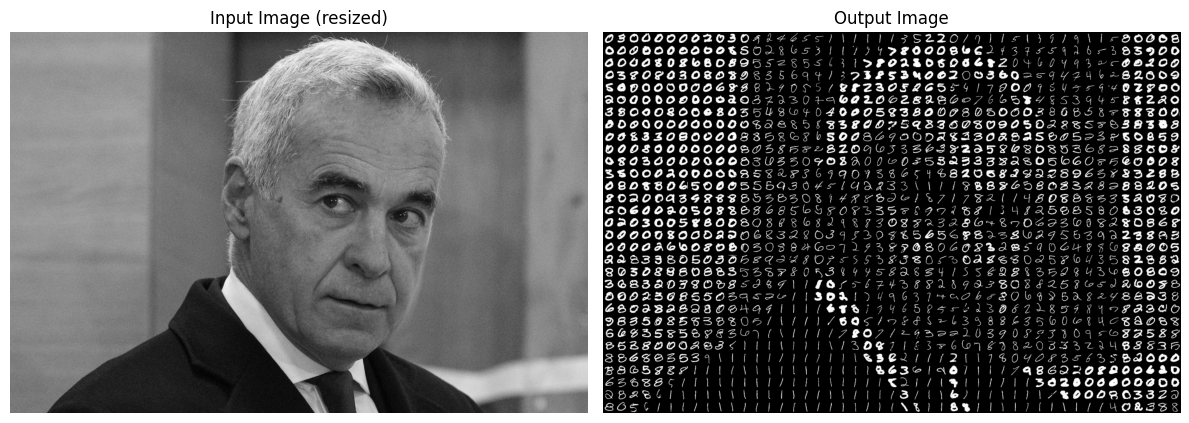


fallbacks used: 461 times


In [25]:
input_image_gray_resized, output_image, fallback_count = fnd(digits, input_file='inputs/george.jpg', scale=.5, k=100)
# save_img_array(output_image, output_file='outputs/georgesmall1600.png')
plot_results(input_image_gray_resized, output_image)
print(f"\nfallbacks used: {fallback_count} times")